<h1>QTM 151 Introduction to Statistical Computing II, Spring 2023 Final Project</h1>

<h2>Title: Analyzing Factors Influencing Formula 1 Driver Success</h2>

<h3>Project Members:</h3>
<ul>
<li>June Yun (Section 4)</li>
<li>Minjoo Kim (Section 4)</li>
<li>Da Eun Kim (Section 4)</li>
</ul>

<h2>Introduction</h2>

<p>Formula 1 is an international car racing competition known for high-speed and technologically advanced vehicles. In this project, we will analyze the dataset to answer the question: What factors contribute to a Formula 1 driver's success. We will be looking at five factors, which are starting grid position, constructor team, driver age, driver nationality and circuit geography. Understanding these factors will provide insights into how a team might strengthen the performance of Formula 1 racers.</p>

<p>The report is structured as follows: we will begin by describing the dataset used for the analysis, followed by data cleaning and merging procedures. Then, we will provide a detailed analysis using summary tables and plots to identify relationships between factors affecting driver success. Finally, we will discuss our findings and summarize the insights we gained from this project.</p>

<h2>Data Description</h2>

<p>We will be using the following dataset tables from the Formula 1 dataset:
<ol>
<li>drivers.csv: Contains information about the drivers, such as their name, nationality, and date of birth. Each row represents a driver, and there are a total of 857 drivers in this table.</li>
<li>races.csv: Contains information about each race, such as the race name, date, and location. Each row represents a race, and there are a total of 1102 races in this table.</li>
<li>results.csv: Contains race results, including the driver's position, points, and status. Each row represents a result, with a total of 25840 entries in this table.</li>
<li>constructors.csv: Contains information about the constructors' teams, such as the team name and nationality. Each row represents a constructor, and there are a total of 211 constructors in this table.</li>
<li>circuits.csv: Contains information about each race circuit, such as the circuit name, location, and length. Each row represents a circuit, and there are a total of 77 circuits in this table.</li>

</ol></p>
<p>The dataset spans from 1950 to 2023. We will merge these tables using the appropriate keys and clean the data to focus on our analysis.</p>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drivers = pd.read_csv("data_raw/drivers.csv")
races = pd.read_csv('data_raw/races.csv')
results = pd.read_csv("data_raw/results.csv")
constructors = pd.read_csv("data_raw/constructors.csv")
circuits = pd.read_csv('data_raw/circuits.csv')

print("Number of drivers:", len(drivers))
print("Number of races:", len(races))
print("Number of results:", len(results))
print("Number of constructors:", len(constructors))
print("Number of circuits:", len(circuits))

Number of drivers: 857
Number of races: 1102
Number of results: 25840
Number of constructors: 211
Number of circuits: 77


<h2>Data Cleaning</h2>
<p>First, we will merge the 'results' table with the 'drivers' and 'races' tables using driver id and race id, respectively. Next, we'll merge the resulting table with the 'constructors' table using constructor_id and merge the resulting table to the 'circuits' table using circuitId. We cleaned the data by removing any rows with missing or incomplete information.</p>

In [39]:
merged_data = results.merge(drivers, on='driverId', how='left')
merged_data = merged_data.merge(races, on='raceId', how='left')
merged_data = merged_data.merge(constructors, on='constructorId', how='left')
merged_data = merged_data.merge(circuits, on='circuitId', how='left')


merged_data['position'] = pd.to_numeric(merged_data['position'], errors='coerce')

# Replace non-numeric values with NaN
merged_data['position'] = merged_data['position'].replace(r'\\N', np.nan, regex=True)

# Drop rows containing NaN in the 'position' column
merged_data.dropna(subset=['position'], inplace=True)

merged_data


/var/folders/rn/4rqq92xn71q0bsrdw18nh9dc0000gn/T/ipykernel_12275/2264181135.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'url_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data = merged_data.merge(circuits, on='circuitId', how='left')


,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,nationality_y,url_x,circuitRef,name,location,country,lat,lng,alt,url_y
0,1,18,1,1,22,1,1.0,1,1,10.0,...,British,http://en.wikipedia.org/wiki/McLaren,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,18,2,2,3,5,2.0,2,2,8.0,...,German,http://en.wikipedia.org/wiki/BMW_Sauber,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,3,18,3,3,7,7,3.0,3,3,6.0,...,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,4,18,4,4,5,11,4.0,4,4,5.0,...,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,5,18,5,1,23,3,5.0,5,5,4.0,...,British,http://en.wikipedia.org/wiki/McLaren,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25834,25840,1096,822,51,77,18,15.0,15,15,0.0,...,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3,http://en.wikipedia.org/wiki/Yas_Marina_Circuit
25835,25841,1096,854,210,47,12,16.0,16,16,0.0,...,American,http://en.wikipedia.org/wiki/Haas_F1_Team,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3,http://en.wikipedia.org/wiki/Yas_Marina_Circuit
25836,25842,1096,825,210,20,16,17.0,17,17,0.0,...,American,http://en.wikipedia.org/wiki/Haas_F1_Team,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3,http://en.wikipedia.org/wiki/Yas_Marina_Circuit
25837,25843,1096,1,131,44,5,18.0,18,18,0.0,...,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3,http://en.wikipedia.org/wiki/Yas_Marina_Circuit


<h2>Description of columns</h2>
<p>The columns that we are interested in analyzing are: 'grid','position','year','dob','name_y','nationality_y','country','driverRef' and 'points'. Below is a summary statistics for the numerical columns. The other columns that we are interested will be analyzed in conjuction with the columns below using scatter plots and bar charts to understand the relationship between the columns. </p>

In [40]:
columns_of_interest = ['grid','position','year','points']
desc_stats = merged_data[columns_of_interest].describe()
print(desc_stats)

               grid      position          year        points
count  14989.000000  14989.000000  14989.000000  14989.000000
mean      11.047435      7.942491   1994.288278      3.234842
std        6.743891      4.806021     20.018259      5.058096
min        0.000000      1.000000   1950.000000      0.000000
25%        5.000000      4.000000   1978.000000      0.000000
50%       11.000000      7.000000   1998.000000      1.000000
75%       16.000000     11.000000   2012.000000      4.000000
max       33.000000     33.000000   2022.000000     50.000000


<h1> Data Analysis </h1>
<h2> 1. Relationship between Starting Grid Position and Finishing Position </h2>
<p>In this section, we will explore the relationship between starting grid position and finishing position to determine if starting closer to the front of the grid increases the chances of securing a better finishing position.</p>

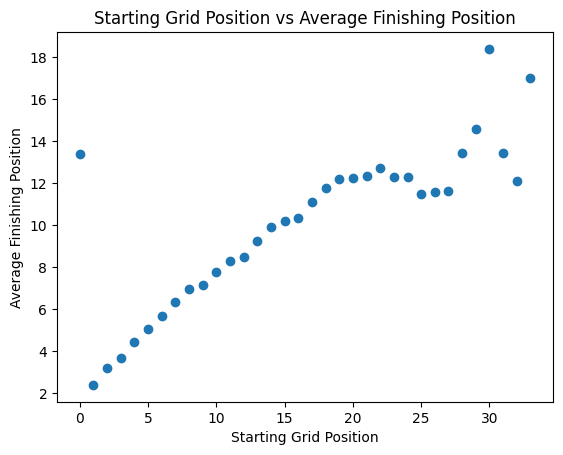

In [41]:
grid_vs_position = merged_data.groupby('grid')['position'].mean().reset_index().sort_values('position')
plt.scatter(grid_vs_position['grid'], grid_vs_position['position'])
plt.xlabel('Starting Grid Position')
plt.ylabel('Average Finishing Position')
plt.title('Starting Grid Position vs Average Finishing Position')
plt.show()




<p> <b>Explanation:</b> The following scatterplot shows that on average, drivers who start the race from higher grid positions tends to finish higher as well with a few outliers. One possible explanation for the observed linear relationship between the starting grid position and the average finishing position in Formula 1 races is the competitive advantage that comes with starting at the front of the grid. </p> 

<h2> 2. Constructor Teams and Driver Success </h2>
<p>In this section, we will investigate the relationship between constructor teams and the average points scored by their drivers to determine which teams are most successful in Formula 1. We have constucted a bar chart that shows the top 20 Formula 1 constructor teams by their average points. The data used in the chart is obtained by merging several data frames, including data about drivers, races, results, constructors and circuits. </p>

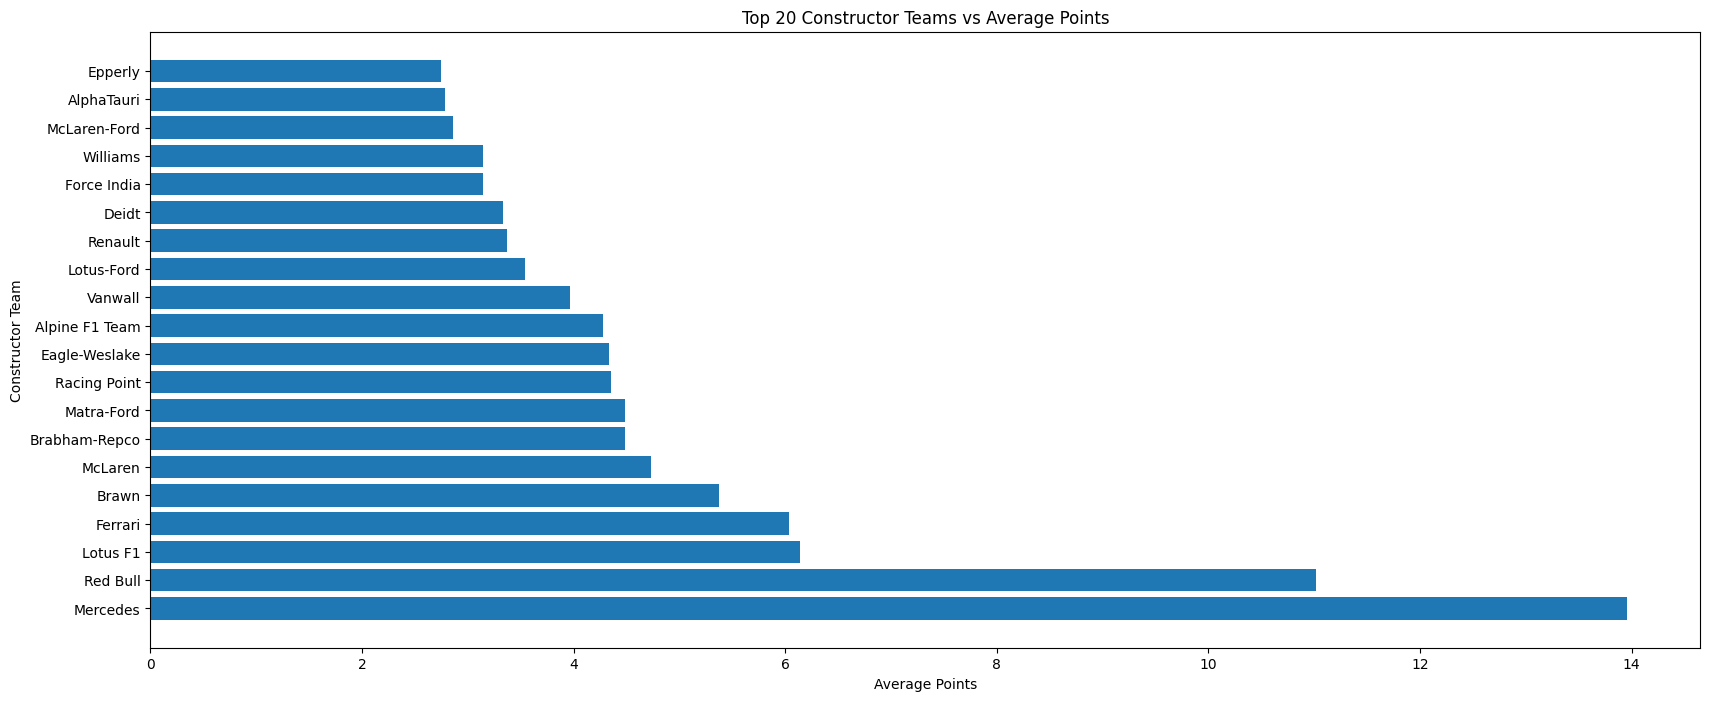

In [42]:
top_teams = merged_data.groupby('name_y')['points'].mean().reset_index().sort_values('points', ascending=False).head(20)

plt.figure(figsize=(20, len(top_teams) * 0.4))

plt.barh(top_teams['name_y'], top_teams['points'])
plt.xlabel('Average Points')
plt.ylabel('Constructor Team')
plt.title('Top 20 Constructor Teams vs Average Points')
plt.show()

<p> <b>Explanation:</b> The bar plot reveals that certain constructor teams, such as Red Bull and Mercedes, consistently outperform other teams in terms of average points scored by their drivers. This finding suggests that the resources and strategies employed by these teams contribute to their success in Formula 1. </p>

<h2>3. Driver Age and Success</h3>
<p>In this section, we will examine the influence of driver's age on their average points scored to determine whether older drivers tend to perform better in races.</p>

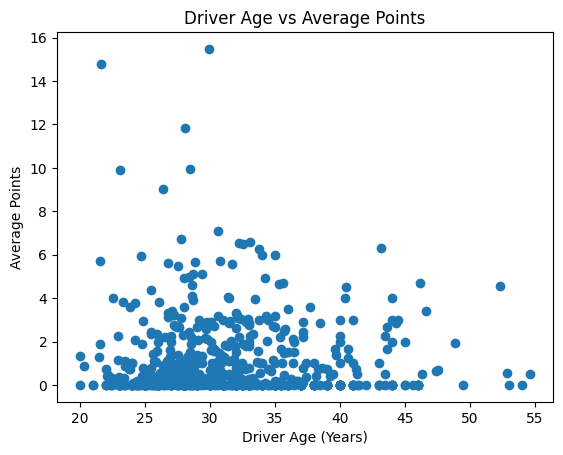

In [43]:
# Calculate years of experience for each driver
merged_data['experience'] = merged_data['year'] - merged_data['dob'].apply(lambda x: int(x[:4]))

# Group data by driver_name and calculate the mean points and average experience
driver_experience_points = merged_data.groupby('driverRef').agg({'experience': 'mean', 'points': 'mean'}).reset_index()

# Create a scatter plot to visualize the relationship between driver experience and average points scored
plt.scatter(driver_experience_points['experience'], driver_experience_points['points'])
plt.xlabel('Driver Age (Years)')
plt.ylabel('Average Points')
plt.title('Driver Age vs Average Points')
plt.show()

<p> <b>Explanation:</b> The scatter plot does not seem to indicate a clear relationship between the two variables. However, the scatter plot shows that most of the high scoring drivers are more likely to be in the age interval of 20-30 years as shown by the outliers. This may be due to the fact that the drivers that are in the age interval are younger and therefore have more physical strength. </p>

<h2>4. Success by Driver Nationality</h2>
<p>In this section, we will explore how driver success varies by nationality to determine if specific countries produce more successful Formula 1 drivers. </p>

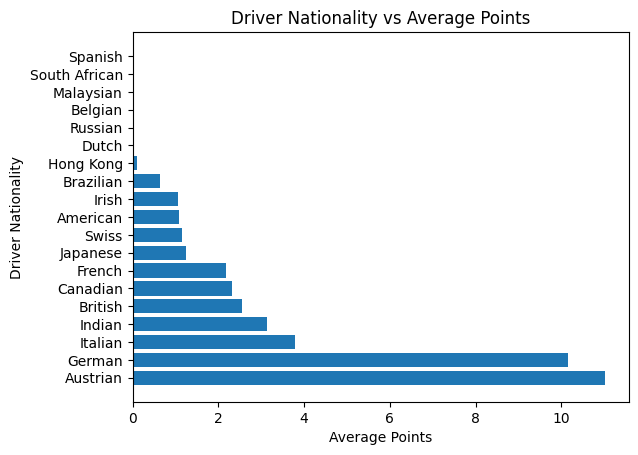

In [44]:
driver_nationality_points = merged_data.groupby('nationality_y')['points'].mean().reset_index().sort_values('points', ascending=False)
plt.barh(driver_nationality_points['nationality_y'], driver_nationality_points['points'])
plt.xlabel('Average Points')
plt.ylabel('Driver Nationality')
plt.title('Driver Nationality vs Average Points')
plt.show()

<p> <b>Explanation:</b> The bar plot demonstrates that drivers from certain countries, such as Germany and Austria, tend to score more points on average. This finding suggests that factors like national support systems, infrastructure, and cultural emphasis on motor sports may contribute to the success of drivers from these countries. It is worth noting that both Germany and Austria are German speaking countries, implying that there might be a correlation between the two factors.</p>



<h2>5. Success by Circuit Geography</h2>
<p>In this section, we will analyze how driver success varies depending on the geography of the circuits to identify any trends or patterns related to specific regions.</p>

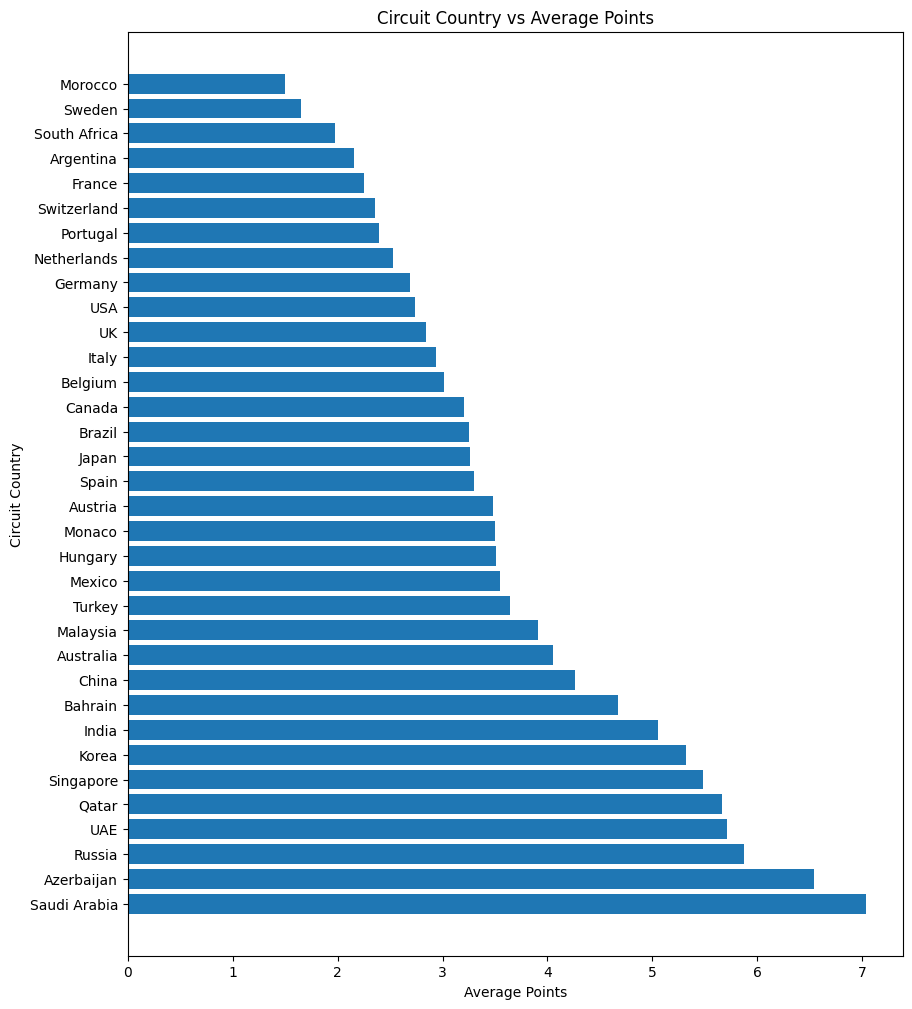

In [45]:
circuit_geography_points = merged_data.groupby('country')['points'].mean().reset_index().sort_values('points', ascending=False)
plt.figure(figsize=(10, 12))
plt.barh(circuit_geography_points['country'], circuit_geography_points['points'])
plt.xlabel('Average Points')
plt.ylabel('Circuit Country')
plt.title('Circuit Country vs Average Points')
plt.show()



<p><b>Explanation:</b> The bar plot shows that circuits in certain countries, such as Saudi Arabia and Azerbaijan, tend to yield higher average points for drivers. This result implies that factors like track characteristics, local weather conditions, and regional familiarity may impact driver performance in different geographic locations.</p>

<h1>Results</h1>
Our comprehensive analysis revealed several insights into the factors that influence driver success in Formula 1:

1. The starting grid position plays a significant role in determining a driver's finishing position. Drivers who start closer to the front of the grid have a higher chance of finishing in a better position.

2. The constructor team also affects a driver's success. Teams with a history of high performance, such as Red Bull and Mercedes, have drivers who score more points on average.

3. Driver age is not correlated with the average points scored, but the higher scoring drivers tend to be younger in the ages 20-30.

4. The success of drivers varies by nationality, with certain countries such as Germany and Austria producing more successful Formula 1 drivers. Factors like national support systems, infrastructure, and cultural emphasis on motor sports may contribute to their success.

5. Driver performance varies depending on the geography of the circuits, with factors like track characteristics, local weather conditions, and regional familiarity potentially impacting their results.

<h1>Discussion</h1>
<p>Our findings provide valuable insights for teams to make strategic decisions when selecting drivers, optimizing car performance, and allocating resources for training and development. Understanding the factors that contribute to driver success can help teams focus on specific aspects that increase their chances of winning.</p>

<p>However, it is important to note that other factors, such as racing conditions, regulations, and individual race strategies, could also impact driver performance. Further research may be needed to account for these factors and to explore additional elements that could influence the success of drivers and teams in Formula 1.</p>